# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# **Loading and Visualizing Data**

In [2]:
stores = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Sales Forecasting/stores.csv")
features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Sales Forecasting/features.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Sales Forecasting/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Sales Forecasting/test.csv")


In [3]:
stores.shape, features.shape, train.shape, test.shape

((45, 3), (8190, 12), (421570, 5), (115064, 4))

In [4]:
# test.info(), train.info(), stores.info(), features.info()

In [5]:
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

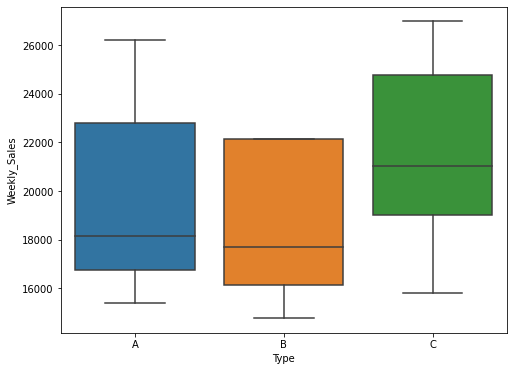

In [6]:
# boxplot for weekly sales for different store types
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [7]:
train['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [8]:
objects = ('Non holidays','Holidays')
y_pos = np.arange(len(objects))
y_pos


array([0, 1])

In [9]:
# holiday and non-holiday total sales
print('sales on non-holiday : ',train[train['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',train[train['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


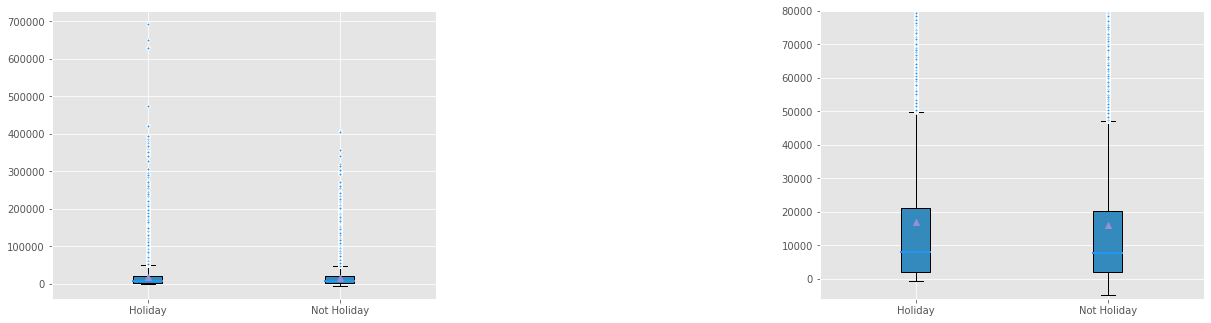

In [10]:
#box plot representation of holiday and non holiday sales
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3','linewidth': 2,'linestyle':'-'}
# outliers
flierprop={'color' : '#EC407A','marker' : 'o','markerfacecolor': '#2196F3', 'markeredgecolor':'white',
          'markersize' : 3,'linestyle' : 'None','linewidth' : 0.1}
          
axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',showmeans=True,flierprops=flierprop,medianprops=medianprop)               
axes[1].boxplot(target,labels=labels, patch_artist = 'Patch', showmeans=True, flierprops=flierprop,medianprops=medianprop)
axes[1].set_ylim(-6000,80000)
plt.show()

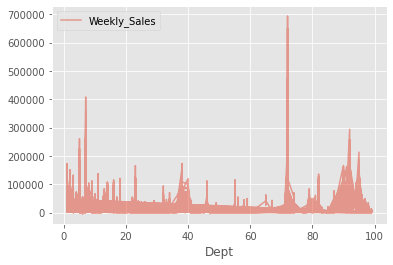

In [11]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

# **Data Cleaning**

In [12]:
#Extracting time value
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

train['Day_of_week'] =train['Date'].dt.dayofweek
test['Day_of_week'] =test['Date'].dt.dayofweek

train['Month'] =train['Date'].dt.month 
test['Month'] =test['Date'].dt.month 

train['Year'] =train['Date'].dt.year
test['Year'] =test['Date'].dt.year

train['Day'] =train['Date'].dt.day 
test['Day'] =test['Date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [13]:
features['Date'] = pd.to_datetime(features['Date'])

# merging train and test file with features
train_with_feature = pd.merge_asof(train, features, on='Store',by='Date')
test_with_feature = pd.merge_asof(test, features, on='Store',by='Date')


train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()

test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()

In [14]:
train_with_feature.head(2)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean
0,1,1,2010-02-05,24924.50,False,5,4,2,2010,5,...,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,60.090059,7.960289
1,1,1,2010-02-12,46039.49,True,6,4,2,2010,12,...,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,60.090059,7.960289


In [15]:
#merging with stores data
train_with_feature_new = pd.merge(train_with_feature,stores)
test_with_feature_new = pd.merge(test_with_feature,stores)

In [16]:
train_with_feature_new.shape


(421570, 24)

In [17]:
train_with_feature_new.head(1)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean,Type,Size
0,1,1,2010-02-05,24924.5,False,5,4,2,2010,5,...,NaN,NaN,NaN,211.096358,8.106,False,60.090059,7.960289,A,151315


In [18]:
# dropping the duplicate of IsHoliday column
train_with_feature = train_with_feature_new.drop(columns=['IsHoliday_x'])
test_with_feature = test_with_feature_new.drop(columns=['IsHoliday_x'])

# renaming IsHoliday_y column to IsHoliday
train_with_feature = train_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})
test_with_feature = test_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})

In [19]:
print(train_with_feature.shape)
train_with_feature.head(2)

(421570, 23)


,Store,Dept,Date,Weekly_Sales,Week,Day_of_week,Month,Year,Day,Temperature,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temp_mean,Unemployment_mean,Type,Size
0,1,1,2010-02-05,24924.50,5,4,2,2010,5,42.31,...,NaN,NaN,NaN,211.096358,8.106,False,60.090059,7.960289,A,151315
1,1,1,2010-02-12,46039.49,6,4,2,2010,12,38.51,...,NaN,NaN,NaN,211.242170,8.106,True,60.090059,7.960289,A,151315


In [20]:
# replacing categorical values with integers
train_with_feature.replace({'IsHoliday':{'False':0, 'True':1}},inplace=True)
test_with_feature.replace({'IsHoliday':{'False':0, 'True':1}},inplace=True)

train_with_feature.replace({'Type':{'A':1, 'B':2, 'C':3}} ,inplace=True)
test_with_feature.replace({'Type':{'A':1, 'B':2, 'C':3}} ,inplace=True)

train_with_feature.describe()

,Store,Dept,Weekly_Sales,Week,Day_of_week,Month,Year,Day,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Temp_mean,Unemployment_mean,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,...,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,25.826762,4.0,6.449510,2010.968591,15.673131,60.090059,3.361027,...,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,6.009006e+01,7.960289,1.589912,136727.915739
std,12.785297,30.492054,22711.183519,14.151887,0.0,3.243217,0.796876,8.753549,18.447931,0.458515,...,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,2.842174e-14,0.000000,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,1.000000,4.0,1.000000,2010.000000,1.000000,-2.060000,2.472000,...,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,6.009006e+01,7.960289,1.000000,34875.000000
25%,11.000000,18.000000,2079.650000,14.000000,4.0,4.000000,2010.000000,8.000000,46.680000,2.933000,...,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,6.009006e+01,7.960289,1.000000,93638.000000
50%,22.000000,37.000000,7612.030000,26.000000,4.0,6.000000,2011.000000,16.000000,62.090000,3.452000,...,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,6.009006e+01,7.960289,1.000000,140167.000000
75%,33.000000,74.000000,20205.852500,38.000000,4.0,9.000000,2012.000000,23.000000,74.280000,3.738000,...,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,6.009006e+01,7.960289,2.000000,202505.000000
max,45.000000,99.000000,693099.360000,52.000000,4.0,12.000000,2012.000000,31.000000,100.140000,4.468000,...,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,6.009006e+01,7.960289,3.000000,219622.000000


In [21]:
train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()

test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()

train_with_feature=train_with_feature.drop(['Type'], axis=1)
test_with_feature=test_with_feature.drop(['Type'], axis=1)

# **Train and Test dataset Correlations**

In [22]:
print(train_with_feature.shape)
train_with_feature.head(2)

(421570, 22)


,Store,Dept,Date,Weekly_Sales,Week,Day_of_week,Month,Year,Day,Temperature,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temp_mean,Unemployment_mean,Size
0,1,1,2010-02-05,24924.50,5,4,2,2010,5,42.31,...,NaN,NaN,NaN,NaN,211.096358,8.106,False,60.090059,7.960289,151315
1,1,1,2010-02-12,46039.49,6,4,2,2010,12,38.51,...,NaN,NaN,NaN,NaN,211.242170,8.106,True,60.090059,7.960289,151315


[]

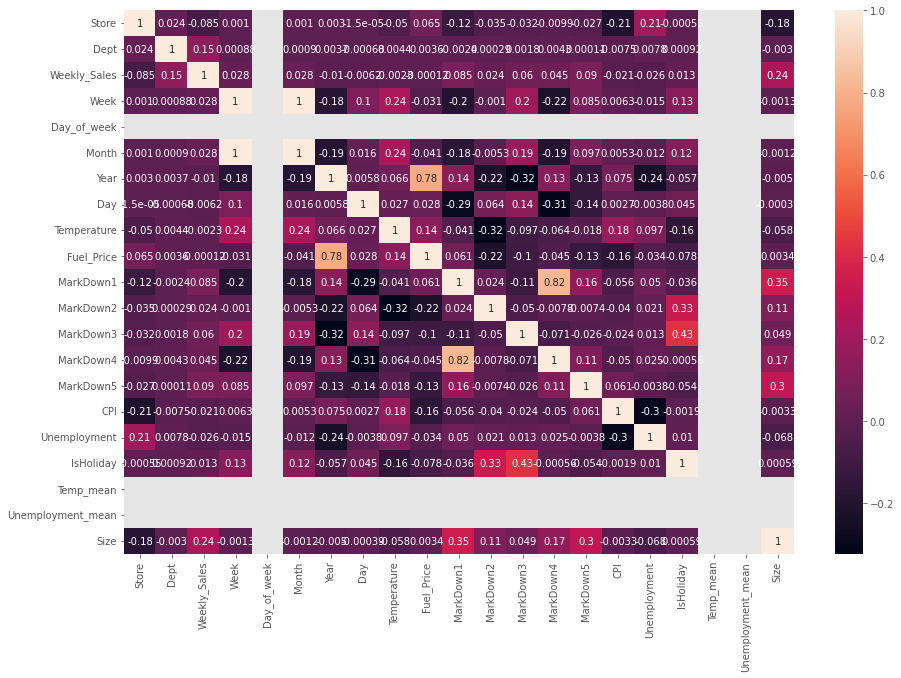

In [23]:
# heatmap for finding correlation
corr = train_with_feature.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [24]:
print(test_with_feature.shape)
test_with_feature.head()

(115064, 21)


,Store,Dept,Date,Week,Day_of_week,Month,Year,Day,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temp_mean,Unemployment_mean,Size
0,1,1,2012-11-02,44,4,11,2012,2,55.32,3.386,...,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,53.941804,6.868733,151315
1,1,1,2012-11-09,45,4,11,2012,9,61.24,3.314,...,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,53.941804,6.868733,151315
2,1,1,2012-11-16,46,4,11,2012,16,52.92,3.252,...,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,53.941804,6.868733,151315
3,1,1,2012-11-23,47,4,11,2012,23,56.23,3.211,...,4.17,74910.32,209.91,303.32,223.561947,6.573,True,53.941804,6.868733,151315
4,1,1,2012-11-30,48,4,11,2012,30,52.34,3.207,...,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,53.941804,6.868733,151315


[]

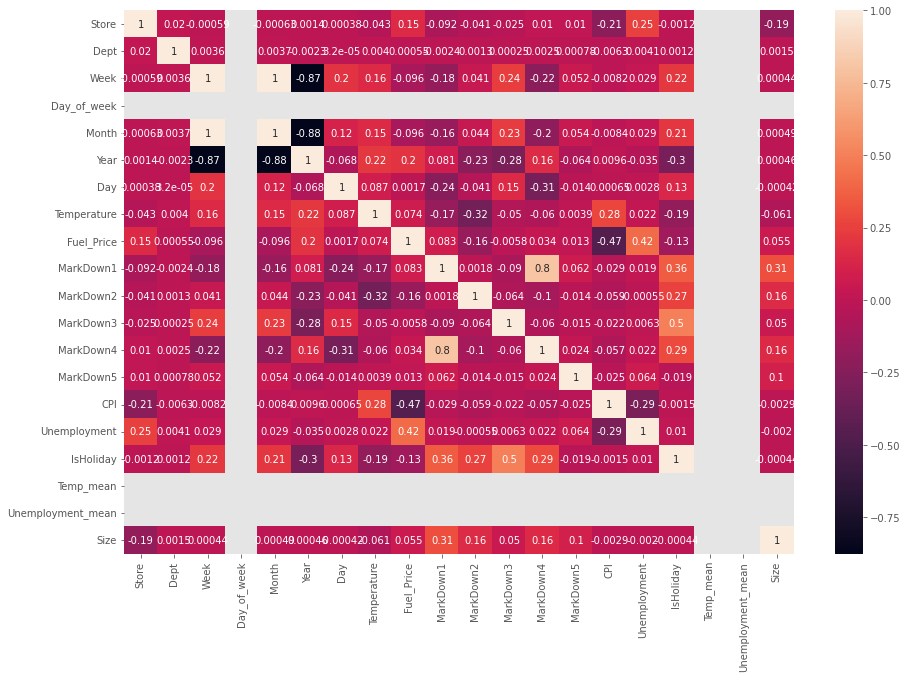

In [25]:
corr = test_with_feature.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

# **Finding Missing Values**

In [26]:
# print(train_with_feature.isnull().sum())
# print(test_with_feature.isnull().sum())

In [27]:
# print(train_with_feature.isnull().sum())
# print(test_with_feature.isnull().sum())

In [28]:
train_with_feature=train_with_feature.fillna(0)
test_with_feature=test_with_feature.fillna(0)

In [29]:
train_with_feature.head(2)


,Store,Dept,Date,Weekly_Sales,Week,Day_of_week,Month,Year,Day,Temperature,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Temp_mean,Unemployment_mean,Size
0,1,1,2010-02-05,24924.50,5,4,2,2010,5,42.31,...,0.0,0.0,0.0,0.0,211.096358,8.106,False,60.090059,7.960289,151315
1,1,1,2010-02-12,46039.49,6,4,2,2010,12,38.51,...,0.0,0.0,0.0,0.0,211.242170,8.106,True,60.090059,7.960289,151315


In [30]:
train_with_feature['Fuel_Price_mean'] = train_with_feature['Fuel_Price'].mean()
train_with_feature['CPI_mean'] = train_with_feature['CPI'].mean()

test_with_feature['CPI_mean'] = test_with_feature['CPI'].mean()
test_with_feature['Fuel_Price_mean'] = test_with_feature['Fuel_Price'].mean()

# dropping unuseful columns
features_drop=['CPI','Unemployment','Fuel_Price','Day_of_week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_final=train_with_feature.drop(features_drop, axis=1)
test_final=test_with_feature.drop(features_drop, axis=1) 

print(train_final.shape)
train_final.head()

(421570, 15)


,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Size,Fuel_Price_mean,CPI_mean
0,1,1,2010-02-05,24924.50,5,2,2010,5,42.31,False,60.090059,7.960289,151315,3.361027,171.201947
1,1,1,2010-02-12,46039.49,6,2,2010,12,38.51,True,60.090059,7.960289,151315,3.361027,171.201947
2,1,1,2010-02-19,41595.55,7,2,2010,19,39.93,False,60.090059,7.960289,151315,3.361027,171.201947
3,1,1,2010-02-26,19403.54,8,2,2010,26,46.63,False,60.090059,7.960289,151315,3.361027,171.201947
4,1,1,2010-03-05,21827.90,9,3,2010,5,46.50,False,60.090059,7.960289,151315,3.361027,171.201947


# **Splitting the Data**

In [31]:
from sklearn.model_selection import train_test_split

y= train_final['Weekly_Sales']
X = train_final.drop(['Weekly_Sales','Date'], axis = 1) 

X.head(2)

,Store,Dept,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Size,Fuel_Price_mean,CPI_mean
0,1,1,5,2,2010,5,42.31,False,60.090059,7.960289,151315,3.361027,171.201947
1,1,1,6,2,2010,12,38.51,True,60.090059,7.960289,151315,3.361027,171.201947


In [32]:
y.head(3)

0    24924.50
1    46039.49
2    41595.55
Name: Weekly_Sales, dtype: float64

In [33]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape,  X_test.shape)
X_train.head(2)

(337256, 13) (84314, 13)


,Store,Dept,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Size,Fuel_Price_mean,CPI_mean
138466,15,3,13,4,2011,1,30.34,False,60.090059,7.960289,123737,3.361027,171.201947
289214,30,25,23,6,2010,11,83.51,False,60.090059,7.960289,42988,3.361027,171.201947


In [34]:
print(y_train.shape, y_test.shape)
y_test.head(2)

(337256,) (84314,)


272342    50932.42
176581     3196.12
Name: Weekly_Sales, dtype: float64

# **Scaling the data**

In [35]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Applying ML models**

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
regressors = {
              'DecisionTreeRegressor': DecisionTreeRegressor(random_state = 42),
              'KNeighborsRegressor': KNeighborsRegressor(),
              'LinearRegression': LinearRegression(),
              'RandomForestRegressor': RandomForestRegressor(random_state = 42),
              'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 42)}

In [38]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [39]:
df_models = pd.DataFrame(columns = ['model', 'run_time', 'r2_score_cv', 'r2_score'])

for key in regressors:
    print('*', key)
    start_time = time.time()
    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cv = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10, n_jobs = -1)
    row = {'model': key,
           'run_time': format(round((time.time() - start_time) / 60, 2)),
           'r2_score_cv': cv.mean(),
           'r2_score': r2_score(y_test, y_pred)}
    df_models = df_models.append(row, ignore_index = True)

* DecisionTreeRegressor
* KNeighborsRegressor
* LinearRegression
* RandomForestRegressor


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


* GradientBoostingRegressor


In [40]:
#results of all algorithms
df_models = df_models.sort_values(by = 'r2_score', ascending = False)
df_models.head()

,model,run_time,r2_score_cv,r2_score
3,RandomForestRegressor,24.34,0.978309,0.977707
0,DecisionTreeRegressor,0.49,0.962528,0.965577
4,GradientBoostingRegressor,6.46,0.738968,0.733297
1,KNeighborsRegressor,0.54,0.233257,0.258104
2,LinearRegression,0.03,0.083969,0.086488


# **Choosing the Top Performing Model**

In [41]:
regressor = RandomForestRegressor(random_state = 42)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

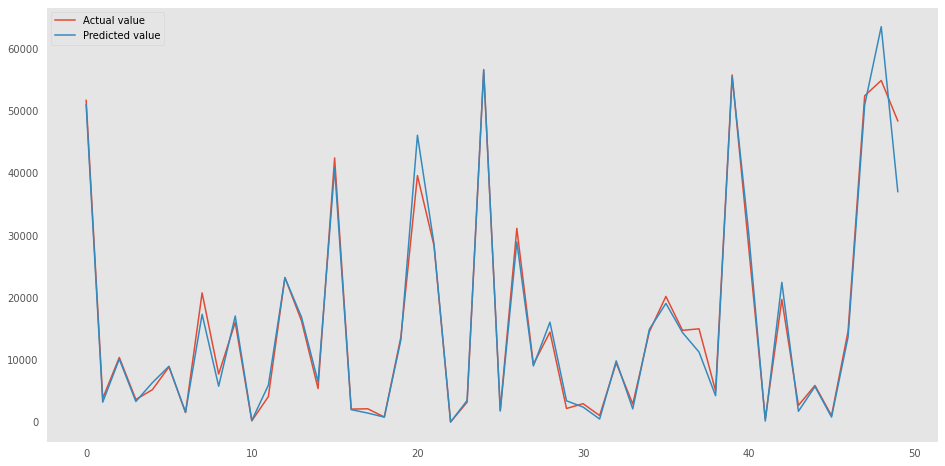

In [42]:
#plot for actual and predicted value
test = pd.DataFrame({'Predicted value': y_pred, 'Actual value': y_test})
fig = plt.figure(figsize = (16, 8))
test = test.reset_index()
test = test.drop(['index'], axis = 1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
plt.tick_params(left = False, bottom = False)
plt.grid()

